## <center> Machines à vecteurs de support (SVM) dans scikit-learn </center>

- Ils peuvent être utilisés à la fois pour la classification et la régression (SVC, SVR). Dans notre cas, nous utiliserons SVC pour classer les tumeurs en malignes ou bénignes.
- Ils peuvent fonctionner à la fois sur des données linéaires et non linéaires.
<br/>
<br/>
Dans la régression logistique, le but était de trouver la meilleure ligne de séparation ou ce que nous aimons appeler la frontière de décision entre les classes. Nous avons fait cela en mesurant la distance par rapport à tous les points.
Ce que fait SVM différemment, c'est de rechercher la marge la plus grande entre les points des côtés des lignes de décision, et ceux-ci sont appelés vecteurs de support.
La classification dans ce cas peut être plus précise car nous ajoutons une autre couche de complexité au modèle pour la prise de décision.<br><br>

* https://scikit-learn.org/stable/modules/svm.html
* https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

![](https://github.com/kplr-training/Machine-Learning/blob/main/01-SUPERVISED/02.CLASSIFICATION/ml-sklearn/SVM.png?raw=1)

D1 et D2 pourraient être des frontières de décision possibles pour les deux classes, mais D2 est le choix optimal car elle maximise la distance entre ces points de classe.
L'idée est que la ligne de décision doit rester aussi éloignée que possible des instances d'entraînement les plus proches.

**La technique du noyau (kernel trick) :**<br/>
Nous avons constaté qu'il était assez facile de traiter des problèmes linéaires à l'aide des SVM. Mais comment traiter les données non linéaires (c'est-à-dire des données qui ne peuvent pas être séparées par une ligne) ?

In [1]:
![](ml-sklearn/SVM2.png)

/bin/bash: -c: line 0: syntax error near unexpected token `ml-sklearn/SVM2.png'
/bin/bash: -c: line 0: `[](ml-sklearn/SVM2.png)'


- Ici, nous avons seulement une caractéristique x1 et les données ne sont pas linéairement séparables. Si nous ajoutons une autre caractéristique x2 qui est x1², alors les données deviennent linéairement séparables.
- Dans ce cas, nous avons utilisé ce qu'on appelle des caractéristiques polynomiales pour rendre les données séparables par une ligne. Nous pouvons utiliser cela pour des données de faible complexité et de petits ensembles de données.
- Cependant, lorsque les données deviennent plus complexes et de plus grande dimension, nous pouvons utiliser la technique du noyau (kernel trick). Avec le noyau, c'est comme si nous ajoutions plusieurs caractéristiques polynomiales. Cela nous permet d'appliquer une sorte de transformation aux données pour changer l'espace d'entrée d'origine en un espace de dimension supérieure où il sera possible de trouver une séparation linéaire pour les données, puis de revenir à l'espace d'origine où elles deviennent non linéaires mais visibles.

In [2]:
![](ml-sklearn/SVM3.png)

/bin/bash: -c: line 0: syntax error near unexpected token `ml-sklearn/SVM3.png'
/bin/bash: -c: line 0: `[](ml-sklearn/SVM3.png)'


Cette astuce est très appréciée car elle permet de gagner en complexité computationnelle et en charge de travail. Elle consiste à calculer le produit scalaire des facteurs transformés sans avoir à traiter la transformation elle-même.

### Noyaux couramment utilisés :

- Linéaire.
- Polynomiale.
- Fonction de base radiale (RBF) - RBF gaussienne.
- Sigmoïde.
- etc...

1. Diviser les données.
2. Instancier le classifieur C-Support Vector avec les paramètres par défaut.

In [3]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC()
svm.fit(X_train, y_train)

print('The accuracy on the training subset: {:.3f}'.format(svm.score(X_train, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(svm.score(X_test, y_test)))

The accuracy on the training subset: 0.904
The accuracy on the test subset: 0.937


#### Obtenir les indices des vecteurs de support

In [4]:
support_vector_indices = svm.support_
print(support_vector_indices)

[  4  12  14  23  36  40  49  56  77  79  94 102 104 105 107 109 113 136
 148 150 153 157 179 185 187 194 195 212 213 218 221 225 230 237 244 253
 261 279 286 292 307 309 310 312 325 332 333 334 341 352 370 372 377 379
 382 384 392 402 406 407 422   3   8  10  13  25  39  43  74  81  87  96
 112 114 119 124 130 139 141 155 156 163 166 181 184 188 189 201 204 207
 215 223 239 246 258 273 278 283 285 288 293 306 316 317 322 344 355 357
 367 368 381 385 393 404 405 408 416 419]


#### Obtenir le nombre de vecteurs de support par classe
(Nous avons deux classes : Oui / Non, Cancer / Pas de cancer)

In [5]:
support_vectors_per_class = svm.n_support_
print(support_vectors_per_class)

[61 57]


In [6]:
print(X_train.shape)

(426, 30)


In [7]:
X_train[:,1]

array([17.46, 19.86, 28.25, 17.84, 20.2 , 18.9 , 16.21, 19.07, 19.65,
       17.33, 18.75, 17.27, 23.94, 15.98, 24.69, 17.67, 19.97, 21.68,
       19.02, 17.2 , 25.42, 15.39, 19.08, 20.83, 20.66, 18.68, 21.57,
       21.94, 14.59, 18.61, 17.94, 18.58, 13.43, 19.94, 15.71, 13.08,
       22.02, 25.11, 20.02, 22.3 , 24.98, 14.23, 23.09, 14.74, 16.32,
       18.57, 14.97, 14.88, 19.98, 21.82, 15.62, 16.18, 19.82, 26.67,
       17.43, 15.6 , 25.2 , 19.54, 12.22, 23.06, 24.27, 18.18, 14.16,
       18.02, 13.14, 21.24, 16.39, 15.34, 14.08, 11.79, 14.78, 19.83,
       17.62, 25.09, 13.98, 22.13, 15.15, 22.33, 18.75, 19.63, 17.15,
       23.77, 12.74, 21.17, 17.88, 29.37, 22.15, 15.7 , 13.32, 16.34,
       32.47, 24.21, 18.24, 16.52, 21.53, 14.71, 14.76, 18.8 , 14.34,
       17.92, 26.57, 19.86, 18.83, 21.28, 19.51, 15.7 , 18.05, 21.88,
       19.56, 22.47, 18.4 , 20.2 , 11.28, 14.26, 13.16, 20.26, 10.82,
       15.86, 18.82, 18.22, 28.92, 19.34, 20.18, 27.88, 27.85, 15.7 ,
       16.85, 16.33,

In [8]:
X_train[:,1].shape

(426,)

#### Plot some support_vectors, for some dimensions

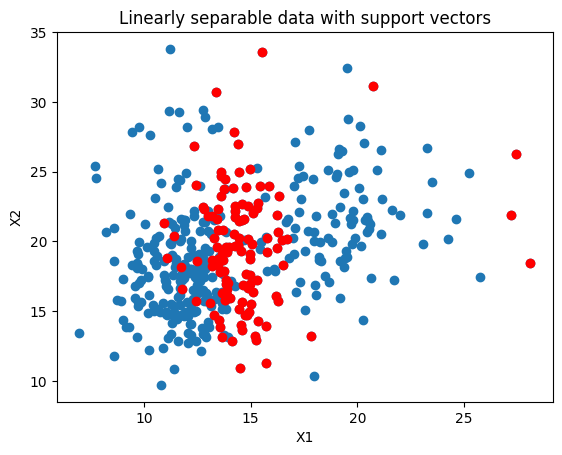

In [9]:
import matplotlib.pyplot as plt

# Get support vectors themselves
support_vectors = svm.support_vectors_

# Visualize support vectors
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

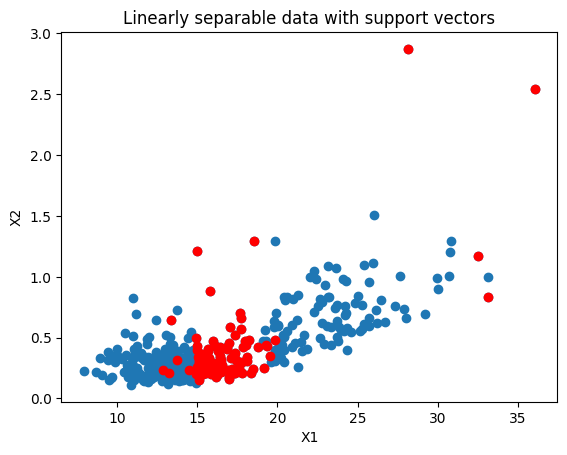

In [10]:
import matplotlib.pyplot as plt
# Get support vectors themselves
support_vectors = svm.support_vectors_

# Visualize support vectors
plt.scatter(X_train[:,20], X_train[:,10])
plt.scatter(support_vectors[:,20], support_vectors[:,10], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### <center>Normalisation des données </center>
Nous pouvons améliorer les performances en normalisant les données.
Les SVM sont très sensibles à l'échelle, et dans notre cas, les données ne sont pas mises à l'échelle (c'est-à-dire normalisées).
Voyons donc comment chaque caractéristique se présente actuellement ou où se situent exactement le minimum et le maximum de chaque caractéristique.

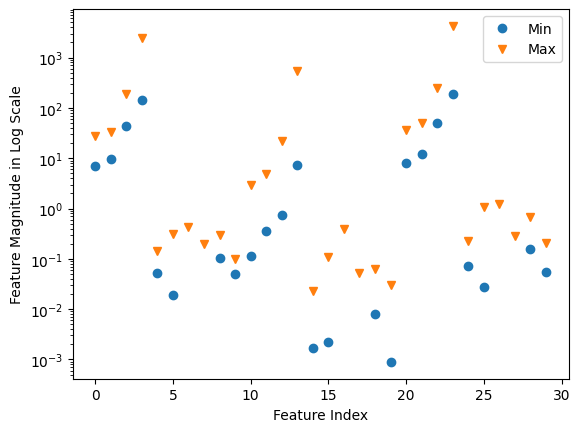

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(X_train.min(axis=0), 'o', label='Min')
plt.plot(X_train.max(axis=0), 'v', label='Max')
plt.xlabel('Feature Index')
plt.ylabel('Feature Magnitude in Log Scale')
plt.yscale('log')
plt.legend(loc='upper right')

Il y a de grands écarts entre les valeurs minimales et maximales de chaque variable, ainsi qu'une différence d'ordres de grandeur entre les caractéristiques. Cela est un facteur qui contribue à la faible performance de notre SVM.

**Normalisons les données !**
Nous pourrions simplement utiliser des scalers intégrés à scikit-learn, tels que le StandardScaler ou le MinMaxScaler, disponibles dans le module de prétraitement.
Nous allons le faire manuellement pour mieux comprendre ce que signifie la mise à l'échelle des données.
Essayons de ramener les valeurs de chaque caractéristique de chaque échantillon dans une certaine plage, comme de 0 à 1.

#### Normaliser l'ensemble de train

In [12]:
# The minimum value of each feature
min_train = X_train.min(axis=0)

# The range of each feature by substracting the minimum from the maximum.
range_train = X_train.max(axis=0) - min_train

# Substract the minimum for each feature and divide by the range to bring data between 0 & 1
X_train_scaled = (X_train - min_train) / range_train

print('Minimum per feature\n{}'.format(X_train_scaled.min(axis=0)))
print('Maximum per feature\n{}'.format(X_train_scaled.max(axis=0)))

Minimum per feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum per feature
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


#### Normaliser l'ensemble de test

In [13]:
X_test_scaled = (X_test - min_train)/range_train

In [14]:
svm = SVC()
svm.fit(X_train_scaled, y_train)

SVC()

In [15]:
print('The accuracy on the training subset: {:.3f}'.format(svm.score(X_train_scaled, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(svm.score(X_test_scaled, y_test)))

The accuracy on the training subset: 0.984
The accuracy on the test subset: 0.972


C'est beaucoup mieux, mais nous sommes dans une situation de sous-ajustement (under-fitting).

### <center> Ajustement des hyperparamètres </center>

Quel hyperparamètre devrions-nous essayer d'ajuster en premier pour améliorer les performances de l'algorithme ?
Essayons avec C et Gamma, qui contrôlent la complexité du modèle.

De manière intuitive :

- Gamma définit jusqu'où l'influence d'un seul exemple d'entraînement s'étend, avec de faibles valeurs signifiant 'loin' et de fortes valeurs signifiant 'proche'.
Les paramètres gamma peuvent être considérés comme l'inverse du rayon d'influence des échantillons sélectionnés par le modèle en tant que vecteurs de support. Il détermine la distance à laquelle un seul échantillon de données exerce une influence.

- C est le paramètre de régularisation (lambda) qui sert de degré d'importance accordé aux erreurs de classification.
Le paramètre C équilibre la classification incorrecte des exemples d'entraînement par rapport à la simplicité de la surface de décision.
Une faible valeur de C rend la surface de décision lisse, tandis qu'une valeur élevée de C vise à classer correctement tous les exemples d'entraînement en donnant au modèle la liberté de sélectionner plus d'échantillons en tant que vecteurs de support.

La valeur par défaut de C est 1.
La valeur par défaut de Gamma est 'auto'.

In [16]:
svm = SVC(C=50)
svm.fit(X_train_scaled, y_train)

print('The accuracy on the training subset: {:.3f}'.format(svm.score(X_train_scaled, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(svm.score(X_test_scaled, y_test)))

The accuracy on the training subset: 0.995
The accuracy on the test subset: 0.979


Les performances sont très bonnes, donc il n'est pas nécessaire d'essayer avec Gamma.

**Améliorations :**
Comme toujours, un fine tuning peut être effectué.

### <center> Avantages et inconvénients des SVM </center>

#### Points forts :
- Polyvalence, ce qui signifie qu'ils peuvent bien fonctionner sur une gamme variée d'ensembles de données.
- Capables de construire des frontières de décision complexes sur des données de faible dimension.
- Peuvent bien fonctionner sur des données de grande dimension avec une taille d'échantillon relativement petite.
- etc.

#### Points faibles :
- Ne performe pas bien sur des données de grande dimension avec de nombreux échantillons (c'est-à-dire > 100 000).
- Un prétraitement peut être nécessaire, ce qui implique une connaissance et une compréhension des hyperparamètres.
- Plus difficile à inspecter et à visualiser.
- etc.

#### Alternatives :
- Arbres de décision et forêts aléatoires (nécessitent moins/aucun prétraitement des données, plus faciles à comprendre, inspecter et visualiser).

#### Bonnes pratiques :
- Mise à l'échelle des données.
- Autres prétraitements.
- Choix d'un noyau approprié.
- Ajustement des hyperparamètres : C, gamma, etc.